In this notebook, let's consider all the functionalities of langchain under the lense of how to be a more productive researcher.

# Leveraging Code Executionm

In [94]:
# !pip install -r requirements.txt

In [1]:
from langchain.chat_models import ChatOpenAI
from langchain.prompts import (
    ChatPromptTemplate,
    SystemMessagePromptTemplate,
    HumanMessagePromptTemplate,
)
from langchain.schema.output_parser import StrOutputParser
from langchain_experimental.utilities import PythonREPL

In [2]:
template = """Write some python code to solve the user's problem. 

Return only python code in Markdown format, e.g.:

```python
....
```"""
prompt = ChatPromptTemplate.from_messages([("system", template), ("human", "{input}")])

model = ChatOpenAI()

In [3]:
def _sanitize_output(text: str):
    _, after = text.split("```python")
    return after.split("```")[0]

In [4]:
chain = prompt | model | StrOutputParser() | _sanitize_output | PythonREPL().run

In [5]:
chain.invoke({"input": "whats 2 plus 2"})

Python REPL can execute arbitrary code. Use with caution.


'4\n'

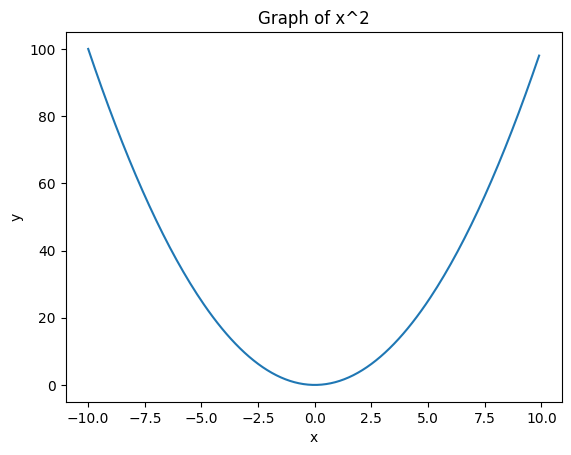

''

In [6]:
chain.invoke({"input": "Plot a graph of x squared"})

# Leveraging Tools

In [7]:
# !pip install duckduckgo-search

In [8]:
from langchain.chat_models import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain.schema.output_parser import StrOutputParser
from langchain.tools import DuckDuckGoSearchRun

In [9]:
search = DuckDuckGoSearchRun()

In [10]:
template = """turn the following user input into a search query for a search engine:

{input}"""
prompt = ChatPromptTemplate.from_template(template)

model = ChatOpenAI()

In [11]:
chain = prompt | model | StrOutputParser() | search

In [12]:
chain.invoke({"input": "I'd like to figure out UFC fights are happening this week"})

'No good DuckDuckGo Search Result was found'

# Extracting Structured Information with Playwright

In [13]:
# see scripts in dev-scripts-playwright-langchain.py

# Automating Literature Review with LangChain

In [14]:
from langchain.chat_models import ChatOpenAI

llm = ChatOpenAI(temperature=0, model="gpt-4-1106-preview")

In [17]:
from langchain.chat_models import ChatOpenAI
from langchain.agents import load_tools, initialize_agent, AgentType

llm = ChatOpenAI(temperature=0.0)
tools = load_tools(
    ["arxiv"],
)

agent_chain = initialize_agent(
    tools,
    llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True,
    handle_parsing_errors=True,
)

In [18]:
agent_chain.run("What are the latest papers about leveraging large language models to augment human learning?")



> Entering new AgentExecutor chain...
I should search for recent papers on leveraging large language models to augment human learning.
Action: arxiv
Action Input: "leveraging large language models to augment human learning"
Observation: Published: 2021-06-02
Title: Not Far Away, Not So Close: Sample Efficient Nearest Neighbour Data Augmentation via MiniMax
Authors: Ehsan Kamalloo, Mehdi Rezagholizadeh, Peyman Passban, Ali Ghodsi
Summary: In Natural Language Processing (NLP), finding data augmentation techniques
that can produce high-quality human-interpretable examples has always been
challenging. Recently, leveraging kNN such that augmented examples are
retrieved from large repositories of unlabelled sentences has made a step
toward interpretable augmentation. Inspired by this paradigm, we introduce
Minimax-kNN, a sample efficient data augmentation strategy tailored for
Knowledge Distillation (KD). We exploit a semi-supervised approach based on KD
to train a model on augmented data.

'The latest papers about leveraging large language models to augment human learning are "Not Far Away, Not So Close: Sample Efficient Nearest Neighbour Data Augmentation via MiniMax," "Robotic Skill Acquisition via Instruction Augmentation with Vision-Language Models," and "Developing Linguistic Patterns to Mitigate Inherent Human Bias in Offensive Language Detection."'

In [19]:
from langchain.utilities import ArxivAPIWrapper

In [20]:
arxiv = ArxivAPIWrapper()
docs = arxiv.run("1605.08386")
docs

'Published: 2016-05-26\nTitle: Heat-bath random walks with Markov bases\nAuthors: Caprice Stanley, Tobias Windisch\nSummary: Graphs on lattice points are studied whose edges come from a finite set of\nallowed moves of arbitrary length. We show that the diameter of these graphs on\nfibers of a fixed integer matrix can be bounded from above by a constant. We\nthen study the mixing behaviour of heat-bath random walks on these graphs. We\nalso state explicit conditions on the set of moves so that the heat-bath random\nwalk, a generalization of the Glauber dynamics, is an expander in fixed\ndimension.'

In [21]:
docs = arxiv.run("Kevin Ellis")
docs

"Published: 2018-10-26\nTitle: Learning to Infer Graphics Programs from Hand-Drawn Images\nAuthors: Kevin Ellis, Daniel Ritchie, Armando Solar-Lezama, Joshua B. Tenenbaum\nSummary: We introduce a model that learns to convert simple hand drawings into\ngraphics programs written in a subset of \\LaTeX. The model combines techniques\nfrom deep learning and program synthesis. We learn a convolutional neural\nnetwork that proposes plausible drawing primitives that explain an image. These\ndrawing primitives are like a trace of the set of primitive commands issued by\na graphics program. We learn a model that uses program synthesis techniques to\nrecover a graphics program from that trace. These programs have constructs like\nvariable bindings, iterative loops, or simple kinds of conditionals. With a\ngraphics program in hand, we can correct errors made by the deep network,\nmeasure similarity between drawings by use of similar high-level geometric\nstructures, and extrapolate drawings. Take

In [22]:
print(docs)

Published: 2018-10-26
Title: Learning to Infer Graphics Programs from Hand-Drawn Images
Authors: Kevin Ellis, Daniel Ritchie, Armando Solar-Lezama, Joshua B. Tenenbaum
Summary: We introduce a model that learns to convert simple hand drawings into
graphics programs written in a subset of \LaTeX. The model combines techniques
from deep learning and program synthesis. We learn a convolutional neural
network that proposes plausible drawing primitives that explain an image. These
drawing primitives are like a trace of the set of primitive commands issued by
a graphics program. We learn a model that uses program synthesis techniques to
recover a graphics program from that trace. These programs have constructs like
variable bindings, iterative loops, or simple kinds of conditionals. With a
graphics program in hand, we can correct errors made by the deep network,
measure similarity between drawings by use of similar high-level geometric
structures, and extrapolate drawings. Taken together thes

In [23]:
import arxiv

To automate literature review with Langchain, you can use the PubMedRetriever and PubMedLoader modules. Here's how you can do it:

• Install the required packages:

In [24]:
!pip install xmltodict # for the PubMedRetriever module.

  Using cached xmltodict-0.13.0-py2.py3-none-any.whl (10.0 kB)


In [30]:
# Import the necessary modules:

from langchain.retrievers import PubMedRetriever #for the PubMedRetriever module.
from langchain.document_loaders import PubMedLoader #for the PubMedLoader module.

In [31]:
#• Create an instance of the PubMedRetriever:

retriever = PubMedRetriever()

In [34]:
# Use the PubMedRetriever to get relevant documents based on a search query:

query = "neuroplasticity"
docs = retriever.get_relevant_documents(query)
docs

[Document(page_content='Neuroblastoma is the most common extracranial solid tumor of childhood and accounts for a significant share of childhood cancer deaths. Prior studies utilizing RNA sequencing of bulk tumor populations showed two predominant cell states characterized by high and low expression of neuronal genes. Although cells respond to treatment by altering their gene expression, it is unclear whether this reflects shifting balances of distinct subpopulations or plasticity of individual cells. Using neuroblastoma cell lines lacking MYCN amplification, we show that the antigen CD49b distinguishes these subpopulations. CD49b expression marks proliferative cells with an immature gene expression program, while CD49b-negative cells express differentiated neuronal marker genes and are non-cycling. Sorted populations spontaneously switch between CD49b expression states in culture, and CD49b-negative cells can generate rapidly growing, CD49b-positive tumors in mice. Though doxorubicin 

In [35]:

# • Create an instance of the PubMedLoader:

loader = PubMedLoader(query)

# Load the documents using the PubMedLoader:

docs = loader.load()

In [36]:
# You can now access the loaded documents and their metadata:

docs #to access the metadata of the first document.

[Document(page_content='Neuroblastoma is the most common extracranial solid tumor of childhood and accounts for a significant share of childhood cancer deaths. Prior studies utilizing RNA sequencing of bulk tumor populations showed two predominant cell states characterized by high and low expression of neuronal genes. Although cells respond to treatment by altering their gene expression, it is unclear whether this reflects shifting balances of distinct subpopulations or plasticity of individual cells. Using neuroblastoma cell lines lacking MYCN amplification, we show that the antigen CD49b distinguishes these subpopulations. CD49b expression marks proliferative cells with an immature gene expression program, while CD49b-negative cells express differentiated neuronal marker genes and are non-cycling. Sorted populations spontaneously switch between CD49b expression states in culture, and CD49b-negative cells can generate rapidly growing, CD49b-positive tumors in mice. Though doxorubicin 

In [37]:
docs[0].page_content #to access the content of the first document.

#By using the PubMedRetriever and PubMedLoader modules, you can automate the process of retrieving and loading relevant literature for your literature review.

'Neuroblastoma is the most common extracranial solid tumor of childhood and accounts for a significant share of childhood cancer deaths. Prior studies utilizing RNA sequencing of bulk tumor populations showed two predominant cell states characterized by high and low expression of neuronal genes. Although cells respond to treatment by altering their gene expression, it is unclear whether this reflects shifting balances of distinct subpopulations or plasticity of individual cells. Using neuroblastoma cell lines lacking MYCN amplification, we show that the antigen CD49b distinguishes these subpopulations. CD49b expression marks proliferative cells with an immature gene expression program, while CD49b-negative cells express differentiated neuronal marker genes and are non-cycling. Sorted populations spontaneously switch between CD49b expression states in culture, and CD49b-negative cells can generate rapidly growing, CD49b-positive tumors in mice. Though doxorubicin treatment selectively k

In [38]:
len(docs)

3

In [39]:
from langchain.tools import PubmedQueryRun

In [40]:
tool = PubmedQueryRun()

In [41]:
tool.run("chatgpt")

"Published: 2023-12-14\nTitle: Potential and Limitations of ChatGPT 3.5 and 4.0 as a Source of COVID-19 Information: Comprehensive Comparative Analysis of Generative and Authoritative Information.\nCopyright Information: ©Guoyong Wang, Kai Gao, Qianyang Liu, Yuxin Wu, Kaijun Zhang, Wei Zhou, Chunbao Guo. Originally published in the Journal of Medical Internet Research (https://www.jmir.org), 14.12.2023.\nSummary::\nBACKGROUND: The COVID-19 pandemic, caused by the SARS-CoV-2 virus, has necessitated reliable and authoritative information for public guidance. The World Health Organization (WHO) has been a primary source of such information, disseminating it through a question and answer format on its official website. Concurrently, ChatGPT 3.5 and 4.0, a deep learning-based natural language generation system, has shown potential in generating diverse text types based on user input.\nOBJECTIVE: This study evaluates the accuracy of COVID-19 information generated by ChatGPT 3.5 and 4.0, asse

With duck duck go search

In [90]:
import requests
from bs4 import BeautifulSoup
from dotenv import load_dotenv
from langchain.prompts import PromptTemplate
from langchain.chat_models import ChatOpenAI
from langchain.chains.openai_functions.extraction import create_extraction_chain_pydantic
from langchain.agents import initialize_agent, AgentType, load_tools, AgentExecutor
import pandas as pd

In [56]:
# ddg_search = DuckDuckGoSearchRun()
arxiv_search = ArxivAPIWrapper()

In [57]:
def parse_html(content):
    soup = BeautifulSoup(content, 'html.parser')
    text_content_with_links = soup.get_text()
    return text_content_with_links

def fetch_web_page(url):
    response = requests.get(url)
    return parse_html(response.content)

In [85]:
tools = load_tools(["arxiv"])
agent = initialize_agent(tools,
                         llm=ChatOpenAI(temperature=0.0, model="gpt-3.5-turbo-1106"),
                         agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
                         verbose=True)

In [89]:
output = agent.invoke({"input": "You are an expert machine learning researcher. You will research 5 papers about large language models and output a json object containing title, abstract and citation, the\
    structure should be as follows: {title: ..., abstract: ..., citation: ...}. You will use the arxiv search engine to find the papers. The output should ONLY BE JSON. OUTPUT:"})



> Entering new AgentExecutor chain...
I should use the arxiv tool to search for papers on large language models and extract the title, abstract, and citation information.
Action: arxiv
Action Input: "large language models"
Observation: Published: 2023-06-12
Title: Lost in Translation: Large Language Models in Non-English Content Analysis
Authors: Gabriel Nicholas, Aliya Bhatia
Summary: In recent years, large language models (e.g., Open AI's GPT-4, Meta's LLaMa,
Google's PaLM) have become the dominant approach for building AI systems to
analyze and generate language online. However, the automated systems that
increasingly mediate our interactions online -- such as chatbots, content
moderation systems, and search engines -- are primarily designed for and work
far more effectively in English than in the world's other 7,000 languages.
Recently, researchers and technology companies have attempted to extend the
capabilities of large language models into languages other than English by
buil

In [91]:
# Define a Pydantic schema for your data (modify according to your data structure)
from pydantic import BaseModel

class LiteratureData(BaseModel):
    title: str
    abstract: str
    citation: str

# Create a chain to extract information based on the schema
extraction_chain = create_extraction_chain_pydantic(
    pydantic_schema=LiteratureData,
    llm=ChatOpenAI(temperature=0, model="gpt-4"),  # specify the model you want to use
)

In [92]:
results = output["output"]
literature_data_output = extraction_chain.run(results)

In [93]:
df = pd.DataFrame([data.dict() for data in literature_data_output])
df.head()  # Displaying the first few rows of the DataFrame

,title,abstract,citation
0,Lost in Translation: Large Language Models in ...,"In recent years, large language models (e.g., ...","Gabriel Nicholas, Aliya Bhatia"
1,Cedille: A large autoregressive French languag...,Scaling up the size and training of autoregres...,"Martin Müller, Florian Laurent"
2,How Good are Commercial Large Language Models ...,Recent advancements in Natural Language Proces...,"Jessica Ojo, Kelechi Ogueji"


,title,abstract,citation
0,Lost in Translation: Large Language Models in ...,"In recent years, large language models (e.g., ...","Gabriel Nicholas, Aliya Bhatia"
1,Cedille: A large autoregressive French languag...,Scaling up the size and training of autoregres...,"Martin Müller, Florian Laurent"
2,How Good are Commercial Large Language Models ...,Recent advancements in Natural Language Proces...,"Jessica Ojo, Kelechi Ogueji"


In [ ]:
# Alternative with create_structured_output_chain() and json_schema
# This example needs some work
# json_schema = {
#     "title": "Literature Review",
#     "description": "Structured output for a literature review",
#     "type": "object",
#     "properties":{
#             "author": {"title": "Author", "description": "Author of the paper", "type": "string"},
#             "abstract": {"title": "Abstract", "description": "Abstract of the paper", "type": "string"},
#             "citation": {"title": "Citation", "description": "Citation of the paper", "type": "string"},
#             "key_points": {"title": "Key Points", "description": "Key points of the paper if available", "type": "string"},
#             },
# "required": [],
# }

# llm = ChatOpenAI(model="gpt-4-1106-preview", temperature=0)
# prompt = ChatPromptTemplate.from_messages([("system", "You are extracting literature information in structured formats"),         ("human", "Use the given format to extract information from the following input: {input}")])

# chain = create_structured_output_chain(json_schema, llm, prompt, verbose=True)
# output = chain.run(literature_data_output)
# output
# output